##Importing necessary Modules

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

##Loading pre-processed Data

In [2]:

# Reading feature vector from file
raw_data = pd.read_csv('input_final.csv')
raw_data.columns = ["F"+str(i) for i in range(1, len(raw_data.columns) + 1)]
input_size = (len(raw_data.columns))

print(raw_data.head())


# Pre-processing the data
features = raw_data.copy()
features = features.iloc[:,:-1]
labels = raw_data.iloc[:,-1:]

print(features.head())
print(labels.head())

features = np.array(features)
print(features)
labels = np.array(labels)



           F1         F2         F3  ...         F79         F80  F81
0  117.022451  95.567316  77.702550  ...  563.138096  372.219223    1
1   40.962661  38.385066  32.198439  ...   66.484803   63.115706    1
2   42.924978  39.831538  34.121057  ...   63.761359   52.928770    1
3   36.683007  36.746411  30.111912  ...   57.602285   56.224384    1
4   38.713092  35.626802  30.483209  ...   57.926560   57.894936    1

[5 rows x 81 columns]
           F1         F2         F3  ...        F78         F79         F80
0  117.022451  95.567316  77.702550  ...  73.861975  563.138096  372.219223
1   40.962661  38.385066  32.198439  ...   9.607606   66.484803   63.115706
2   42.924978  39.831538  34.121057  ...  11.482237   63.761359   52.928770
3   36.683007  36.746411  30.111912  ...   6.235513   57.602285   56.224384
4   38.713092  35.626802  30.483209  ...   8.840690   57.926560   57.894936

[5 rows x 80 columns]
   F81
0    1
1    1
2    1
3    1
4    1
[[117.02245146  95.56731638  77.7025

##Building Model Architecture
###Deep Neural Network

In [3]:
# Initialize model
model = Sequential()

# 1 FC Layer
model.add(Dense(128 , input_shape = (input_size-1,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2 FC Layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3 FC Layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# 4 FC Layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# 5 FC Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10368     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

###Visualizing the model

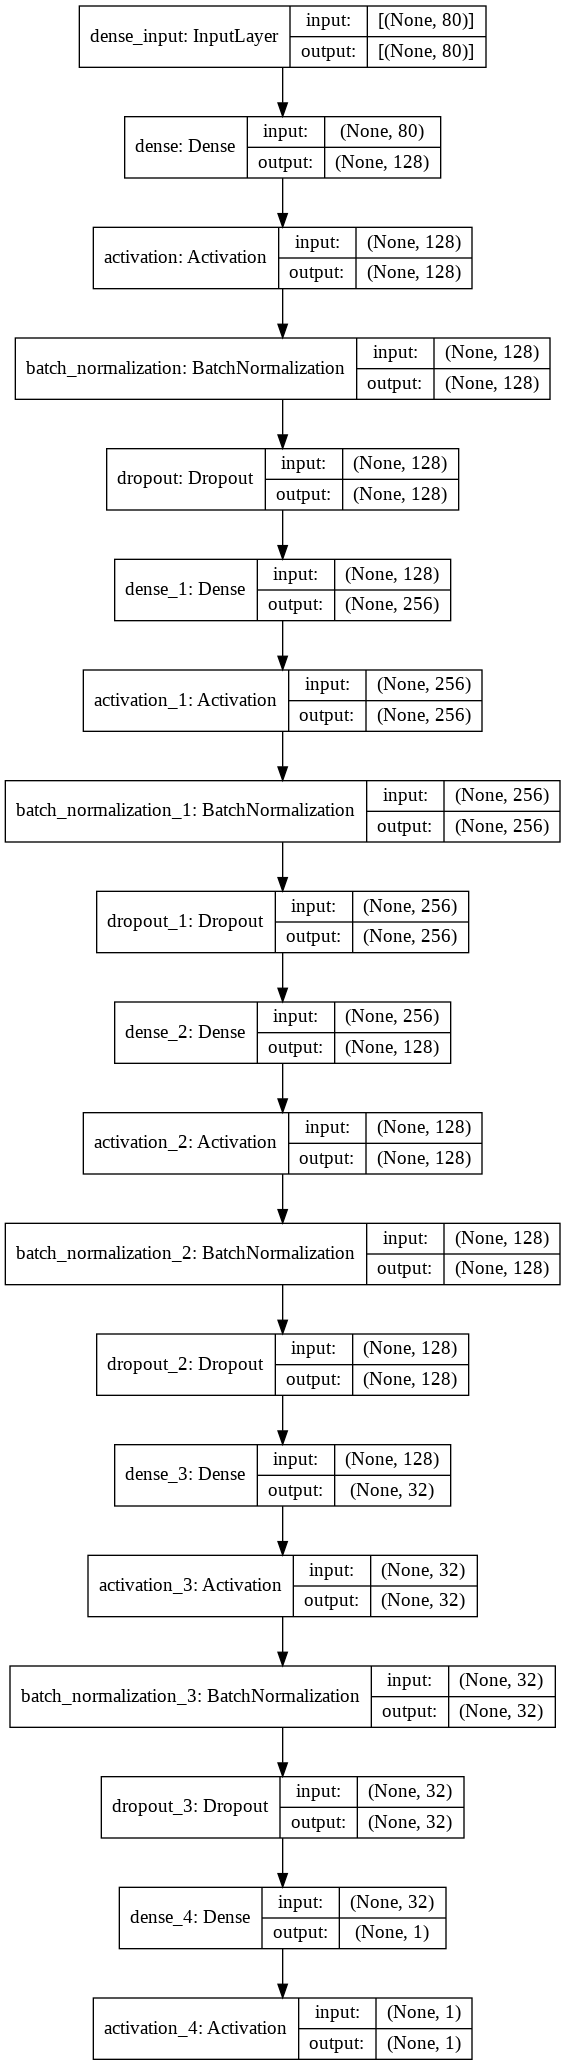

###Creating Checkpoints to save highest accuracy

In [5]:
batch_size = 4
epochs = 50

checkpoint = ModelCheckpoint("DNN-Adam-50Epochs-batch4-10crossFold.h5",
                             monitor="accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=0)

earlystop = EarlyStopping(monitor = 'accuracy',
                          min_delta = 0,
                          patience = 10, 
                          verbose = 0,
                          restore_best_weights = True)

callbacks = [checkpoint , earlystop]


###K Cross Fold Training

In [6]:
kfold = KFold(n_splits=10, shuffle=True)
avg_accuracy = 0
i = 0
for train, test in kfold.split(features, labels):
    history = model.fit(features[train], labels[train],
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data = (features[test], labels[test]),
            callbacks = callbacks)


    scores = model.evaluate(features[test], labels[test], verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1]*100 , "%")
    avg_accuracy+=scores[1]
    i+=1
avg_accuracy/=i


1/1 [==============================] - 0s 22ms/step - loss: 0.7118 - accuracy: 0.5714
Test loss: 0.7118074297904968
Test accuracy: 57.14285969734192 %
1/1 [==============================] - 0s 20ms/step - loss: 0.5629 - accuracy: 0.7143
Test loss: 0.5628985166549683
Test accuracy: 71.42857313156128 %
1/1 [==============================] - 0s 19ms/step - loss: 0.5652 - accuracy: 0.7143
Test loss: 0.5651578903198242
Test accuracy: 71.42857313156128 %
1/1 [==============================] - 0s 19ms/step - loss: 0.7975 - accuracy: 0.4286
Test loss: 0.7974671721458435
Test accuracy: 42.85714328289032 %
1/1 [==============================] - 0s 21ms/step - loss: 0.8969 - accuracy: 0.4286
Test loss: 0.896900475025177
Test accuracy: 42.85714328289032 %
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.7143
Test loss: 0.6930518746376038
Test accuracy: 71.42857313156128 %
1/1 [==============================] - 0s 20ms/step - loss: 0.9852 - accuracy: 0.8571
Test loss

##Average Accuracy accross K Fold

In [13]:
avg_accuracy*100

71.42857253551483

In [14]:
model = keras.models.load_model('DNN-Adam-50Epochs-batch4-10crossFold.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10368     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [17]:
# scores = model.evaluate(features, labels, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1]*100 , "%")

In [16]:
model.predict(np.array([features[0]]))

array([[0.7236563]], dtype=float32)

In [18]:
labels[0]

array([1])